# Loading the data

Importing all the packages for machine learing 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import mean_squared_error


Loading the 3 separate csv files with pandas and merging them step by step

In [3]:
df1 = pd.read_csv('Walmart_features.csv')
df2 = pd.read_csv('Walmart_Sales_Forecasting.csv')
df3 = pd.read_csv('Walmart_store_details.csv')

In [4]:
df1.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

In [5]:
df2.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [6]:
df3.columns

Index(['Store', 'Type', 'Size'], dtype='object')

In [7]:
df4 = pd.merge(df1, df2, on=['Store', 'Date', 'IsHoliday']) #which 2 dataframes to combine, and what columns to merge data in on.
df4.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38


In [8]:
df = pd.merge(df3, df4, on=['Store']) #which 2 dataframes to combine, and what columns to merge data in on.
df.head()
#df = full dataframe with 3 files combined

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
0,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50
1,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27
2,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12
3,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04
4,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38


# Exploratory Analysis

Initial data exploration and engineering, checking the different the different features, ranges etc... 

In [9]:
df.Temperature.min() # finding out temperature ranges, minimum

-2.06

In [10]:
df.Temperature.max() # finding out temperature ranges, maximum

100.14

Assigning Temperatures to ranges :1,2,3. 
1 and 3 represent "extreme" temperatures that might affect shopping behavior (under 20F and over 90F)

In [11]:
def assign_label(temp): # def function assign_label
  if temp < 20: # 1 is extremely cold, uner 20F 
     return 1 
  elif temp >= 20 and temp < 90 : # 2 is ok to go shopping between 20F and 88F:)
     return 2
  elif temp >= 90 and temp < 101 :  #  3 is extremely hot, over 88 and under 101 (max is 100.14F)
     return 3

In [12]:
assign_label(100) # checking if function works and assigns temperatures correctly

3

In [13]:
df.loc[:,'Temp_Categories'] = df.apply(lambda x: assign_label(x['Temperature']), axis =1) 
# running assign_label function and storing data in new column 'Temp_Categories'

In [14]:
df.Temp_Categories.unique()
# It works ! 1,2 or 3 are the arrays

array([2, 3, 1])

In [15]:
#shifting 'Date' from object to datetime64[ns] 
df.Date = df.Date.astype('datetime64') 
df['Year'] = df['Date'].dt.year #Splitting Date into year and week, creating 2 new columns 
df['Week'] = df['Date'].dt.week
df.head()

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Temp_Categories,Year,Week
0,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,2,2010,5
1,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27,2,2010,5
2,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12,2,2010,5
3,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04,2,2010,5
4,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38,2,2010,5


Finding out when sales are reported 

In [16]:
df.Date.dt.weekday_name.unique()
# Sales are reported on Fridays

array(['Friday'], dtype=object)

In [17]:
df.Date.min()

Timestamp('2010-02-05 00:00:00')

In [18]:
df.Date.max()

Timestamp('2012-10-26 00:00:00')

Our time range for this study is from 02/05/2010 to 10/26/2012

In [19]:
df.Date.max()-df.Date.min()

Timedelta('994 days 00:00:00')

Let's find out how many Stores and Depts?

In [20]:
df['Store'].nunique() #using .nunique() to find distinct values

45

In [21]:
df['Dept'].nunique() #using .nunique() to find distinct values

81

In [22]:
df.Type = df.Type.map({'A':1, 'B':2,'C':3}) # replacing Type with integer values: 1, 2 and 3 
df.head()

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Temp_Categories,Year,Week
0,1,1,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,2,2010,5
1,1,1,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27,2,2010,5
2,1,1,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12,2,2010,5
3,1,1,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04,2,2010,5
4,1,1,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38,2,2010,5


In [23]:
df.IsHoliday = df.IsHoliday.map({True:1, False:0}) # using  1 and 0 vs Boolean for IsHoliday columns

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 19 columns):
Store              421570 non-null int64
Type               421570 non-null int64
Size               421570 non-null int64
Date               421570 non-null datetime64[ns]
Temperature        421570 non-null float64
Fuel_Price         421570 non-null float64
MarkDown1          150681 non-null float64
MarkDown2          111248 non-null float64
MarkDown3          137091 non-null float64
MarkDown4          134967 non-null float64
MarkDown5          151432 non-null float64
CPI                421570 non-null float64
Unemployment       421570 non-null float64
IsHoliday          421570 non-null int64
Dept               421570 non-null int64
Weekly_Sales       421570 non-null float64
Temp_Categories    421570 non-null int64
Year               421570 non-null int64
Week               421570 non-null int64
dtypes: datetime64[ns](1), float64(10), int64(8)
memory usage: 64.3 MB


As we can see in df.info(), all the data is now in integer, float or datetime64[ns] format. We can now start our grphic exploration

# Graphic Exploration

Fist weekly sales data visualisation, uning groupby Date and Weekly_Sales

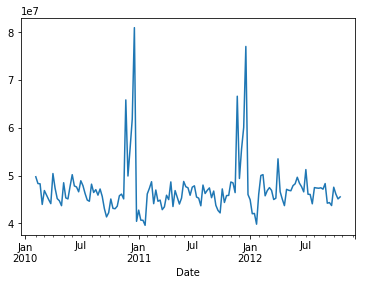

In [25]:
df.groupby('Date')['Weekly_Sales'].sum().plot()

Graphically, there seems to be a strong seasonality of sales around the winter holiday period, trend looks neutral otherwise

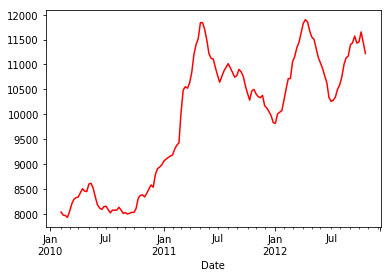

In [26]:
#Exploring variations of Fuel_Price data
df.groupby('Date')['Fuel_Price'].sum().plot(style='r')

No immediate visual correlation beween seasonal variations of sales and fuel price evolution

Exploring CPI data, metric for inflation, showing a symilar trend to Fuel_Price but not showing a real impact on Weekly_Sales graphically  

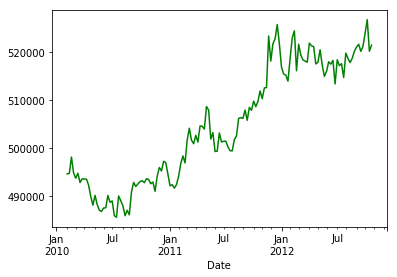

In [27]:
df.groupby('Date')['CPI'].sum().plot(style='g')

Exploring the MarkDown fields, all in the same graph 

[None, None, None, None, None]

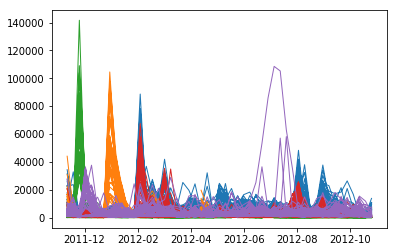

In [28]:
lines = plt.plot(df.Date, df.MarkDown1, df.Date, df.MarkDown2, df.Date, df.MarkDown3, df.Date, df.MarkDown4, df.Date, df.MarkDown5)
plt.setp(lines,linewidth=1.0,)

# Initial Model

Initialising supervised marchine learning regression models

Using fillna(0) to replace NaN by 0 values in the MarkDown fields that create an error if still present in the dataframe


In [29]:
df_test = df.fillna(0)

Define X and y, creating an initial model using LinearRegression(), Lasso(), Ridge() and measuring performances

In [30]:
X = df_test.drop(['Temperature','Date','Weekly_Sales'], axis=1) # dropping 'Temperature','Date','Weekly_Sales' because they are present in new columns
y = df_test.Weekly_Sales
X_train, X_test, y_train, y_test = train_test_split(X, y)
models = [LinearRegression(), Lasso(), Ridge()] # list of 3 models
names = ['OLS', 'Lasso', 'Ridge']
for model, name in list(zip(models, names)):
    model.fit(X_train, y_train)
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test) 
    print('Model Stats for: {}'.format(name))
    print('Train R^2:', model.score(X_train, y_train))
    print('Test R^2:', model.score(X_test, y_test))
    print('Training MSE: {}'.format(mean_squared_error(y_train, y_hat_train)))
    print('Testing MSE: {}'.format(mean_squared_error(y_test, y_hat_test)))
    print('\n')

Model Stats for: OLS
Train R^2: 0.08698216103508027
Test R^2: 0.08842137570267494
Training MSE: 468503095.35030043
Testing MSE: 477462284.410203


Model Stats for: Lasso
Train R^2: 0.08698196730607421
Test R^2: 0.08842806184491003
Training MSE: 468503194.7597918
Testing MSE: 477458782.3746568


Model Stats for: Ridge
Train R^2: 0.08698216103403145
Test R^2: 0.08842138872474925
Training MSE: 468503095.3508386
Testing MSE: 477462277.5895633




First Results : 

OLS Test R^2: 0.086741
Lasso Test R^2: 0.0865433
Ridge Test R^2: 0.086741

# Evaluation

Numbers are < 0.1, which is not good. Objective is to get results >0.6
Need some feature ingeneering to improve the model 

Feature ingeeering adding dummies for Store, Dept, Type columns 

In [31]:
# Getting dummy data for Store, Dept, Type in a new dataframe

df_dum1 = pd.get_dummies(df['Store'], prefix ='Store')
df_dum2 = pd.get_dummies(df['Dept'], prefix ='Dept')
df_dum3 = pd.get_dummies(df['Type'], prefix ='Type')

df_dummies = pd.concat([df, df_dum1, df_dum2, df_dum3], axis=1)
df_dummies.head(10)

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_1,Type_2,Type_3
0,1,1,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0
1,1,1,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0
2,1,1,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0
3,1,1,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0
4,1,1,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0
5,1,1,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0
6,1,1,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0
7,1,1,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0
8,1,1,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0
9,1,1,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0


In [32]:
df_test2 = df_dummies.fillna(0)  # replacing Null values (in Markdown field) with O, using fillna(0)
df_test2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 148 columns):
Store              int64
Type               int64
Size               int64
Date               datetime64[ns]
Temperature        float64
Fuel_Price         float64
MarkDown1          float64
MarkDown2          float64
MarkDown3          float64
MarkDown4          float64
MarkDown5          float64
CPI                float64
Unemployment       float64
IsHoliday          int64
Dept               int64
Weekly_Sales       float64
Temp_Categories    int64
Year               int64
Week               int64
Store_1            uint8
Store_2            uint8
Store_3            uint8
Store_4            uint8
Store_5            uint8
Store_6            uint8
Store_7            uint8
Store_8            uint8
Store_9            uint8
Store_10           uint8
Store_11           uint8
Store_12           uint8
Store_13           uint8
Store_14           uint8
Store_15           uint8
Store_16 

Running for second time with dummies and without NaN values 

# Model 2

In [33]:
X = df_test2.drop(['Store','Type','Dept','Temperature','Date','Weekly_Sales'], axis=1) # removing 'Store','Type','Dept','Temperature','Date'
y = df_test2.Weekly_Sales
X_train, X_test, y_train, y_test = train_test_split(X, y)
models = [LinearRegression(), Lasso(), Ridge()]
names = ['OLS', 'Lasso', 'Ridge']
for model, name in list(zip(models, names)):
    model.fit(X_train, y_train)
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test) 
    print('Model Stats for: {}'.format(name))
    print('Train R^2:', model.score(X_train, y_train))
    print('Test R^2:', model.score(X_test, y_test))
    print('Training MSE: {}'.format(mean_squared_error(y_train, y_hat_train)))
    print('Testing MSE: {}'.format(mean_squared_error(y_test, y_hat_test)))
    print('\n')
    


Model Stats for: OLS
Train R^2: 0.6595694376175378
Test R^2: 0.6550692791264404
Training MSE: 175271630.6486122
Testing MSE: 178890328.94884017




/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Model Stats for: Lasso
Train R^2: 0.6595040720321095
Test R^2: 0.6550106489694315
Training MSE: 175305284.30375457
Testing MSE: 178920736.12175626


Model Stats for: Ridge
Train R^2: 0.6595685749338793
Test R^2: 0.6550698691668864
Training MSE: 175272074.80371538
Testing MSE: 178890022.9380297




# Evaluation

Getting significantly better results :  
OLS Test R^2: 0.6585
Lasso Test R^2: 0.6584
Ridge Test R^2: 0.6585

# Further Investigation/Exploration

Cross Validation test with Ridge regularisation model 

In [34]:
model = Ridge()
model.fit(X_train, y_train)
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test) 
print('Model Stats for: {}'.format('Ridge'))
print('Train R^2:', model.score(X_train, y_train))
print('Test R^2:', model.score(X_test, y_test))
print('Training MSE: {}'.format(mean_squared_error(y_train, y_hat_train)))
print('Testing MSE: {}'.format(mean_squared_error(y_test, y_hat_test)))
print('Model details:', model)
print('\n')

Model Stats for: Ridge
Train R^2: 0.6595685749338793
Test R^2: 0.6550698691668864
Training MSE: 175272074.80371538
Testing MSE: 178890022.9380297
Model details: Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)




Cross Validation test with Ridge, normalizing the data

In [35]:
model = Ridge(normalize=True)
model.fit(X_train, y_train)
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test) 
print('Model Stats for: {}'.format('Ridge'))
print('Train R^2:', model.score(X_train, y_train))
print('Test R^2:', model.score(X_test, y_test))
print('Training MSE: {}'.format(mean_squared_error(y_train, y_hat_train)))
print('Testing MSE: {}'.format(mean_squared_error(y_test, y_hat_test)))
print('Model details:', model)
print('\n')  

Model Stats for: Ridge
Train R^2: 0.5027040789203532
Test R^2: 0.4983051530969498
Training MSE: 256034200.90294322
Testing MSE: 260192411.8765969
Model details: Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)




R^2 is lower , not a good solution to Normalise the data with Ridge 

Cross Validation test with OLS normalizing the data

In [36]:
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test) 
print('Model Stats for: {}'.format('OLS'))
print('Train R^2:', model.score(X_train, y_train))
print('Test R^2:', model.score(X_test, y_test))
print('Training MSE: {}'.format(mean_squared_error(y_train, y_hat_train)))
print('Testing MSE: {}'.format(mean_squared_error(y_test, y_hat_test)))
print('Model details:', model)
print('\n')  

Model Stats for: OLS
Train R^2: 0.6595445980298913
Test R^2: 0.6550379034435497
Training MSE: 175284419.38003802
Testing MSE: 178906601.22003448
Model details: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)




Normalisation does not have much effect, very similar but good results (>0.6) 

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import seaborn as sns
%matplotlib inline

Attempting PolynomialFeatures with Ridge

In [38]:
for col in X.columns:
    minimum = X[col].min()
    maximum = X[col].max()
    range_ = maximum - minimum
    X[col] = X[col].map(lambda x: (x-minimum)/range_)

# Test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Make a pipeline model with polynomial transformation
# Currently with OLS

degree_min = 2
degree_max = 5

degrees = []
train_errs = []
test_errs = []

for degree in range(degree_min,degree_max+1):
    model = make_pipeline(PolynomialFeatures(degree, interaction_only=False),Ridge())
    model.fit(X_train,y_train)
    #Get r^2 values for testing predictions and training predictions
    test_score = model.score(X_test,y_test)
    test_errs.append(test_score) # removing errors 
    train_score = model.score(X_train,y_train)
    train_errs.append(train_score) # removing errors 
    degrees.append(degree) 

#Plotting the Results
plt.scatter(degrees, train_errs, label='Train R^2')
plt.scatter(degrees, test_errs, label='Test R^2')
plt.title('Train and Test Accuracy vs Model Complexity')
plt.xlabel('Maximum Degree of Polynomial Regression')
plt.legend()

KeyboardInterrupt: 

# Consulsion

Best results over 0.65 are obtained with Ridge without Normaisation, and with Linear Regression with Normalisation.

Polynomial features do not work on my machine unfortunately and crashes all the time (1,8 GHz Intel Core i5 - 8G RAM)
For further data engineering, I would like to reformat the data and work without departements (store data only) and create new date fields such as months and quarters, understand better seasonality with seasonal_decompose  

<Figure size 432x288 with 0 Axes>

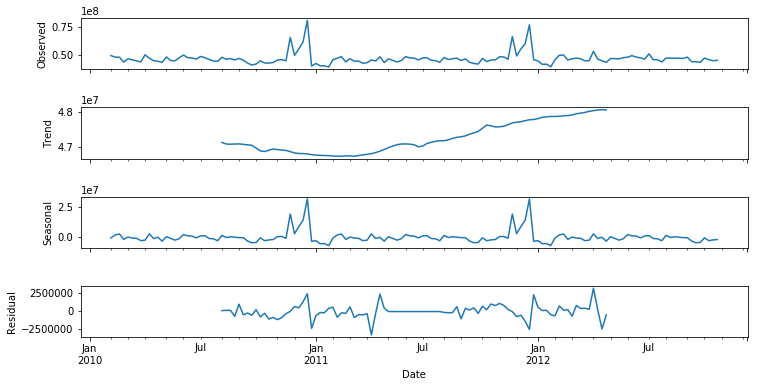

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df_test2.groupby('Date')['Weekly_Sales'].sum(), freq=52)  # using 52 for weekly sales 
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(12, 6)

Although the dataset is here only covers 994 days, seasonal decompose can show us a light upward trend and strong seasonal variations 